# Iris Model Training

In [1]:
from warnings import filterwarnings
filterwarnings("ignore")

### Step 1 - Data Ingestion

In [2]:
import pandas as pd
df = pd.read_csv("iris.csv")
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


### Target - Species

### Step 2 - Perform Basic Data quality checks

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [6]:
df.duplicated().sum()

np.int64(1)

In [7]:
df = df.drop_duplicates(keep="first").reset_index(drop=True)

In [8]:
df.shape

(149, 5)

### Step 3 - Seperate X and Y

In [9]:
X = df.drop(columns=["species"])
Y = df[["species"]]

In [10]:
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
Y.head()

,species
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa


In [12]:
Y.value_counts()

species   
setosa        50
versicolor    50
virginica     49
Name: count, dtype: int64

### Step 4 - Apply train test split

In [15]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.33, random_state=42)

In [16]:
xtrain.head()

,sepal_length,sepal_width,petal_length,petal_width
95,5.7,3.0,4.2,1.2
104,6.5,3.0,5.8,2.2
66,5.6,3.0,4.5,1.5
0,5.1,3.5,1.4,0.2
141,6.9,3.1,5.1,2.3


In [17]:
ytrain.head()

,species
95,versicolor
104,virginica
66,versicolor
0,setosa
141,virginica


In [18]:
xtest.head()

,sepal_length,sepal_width,petal_length,petal_width
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
117,7.7,3.8,6.7,2.2
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [19]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [20]:
xtrain.shape

(99, 4)

In [21]:
xtest.shape

(50, 4)

### Step 5 - Model Building

In [22]:
X.dtypes

sepal_length    float64
sepal_width     float64
petal_length    float64
petal_width     float64
dtype: object

In [24]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [25]:
model = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler(),
    LogisticRegression()
)

model.fit(xtrain, ytrain)

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Step 6 - Evaluate the model

In [28]:
model.score(xtrain, ytrain)

0.9494949494949495

In [29]:
model.score(xtest, ytest)

1.0

In [26]:
from sklearn.metrics import ConfusionMatrixDisplay

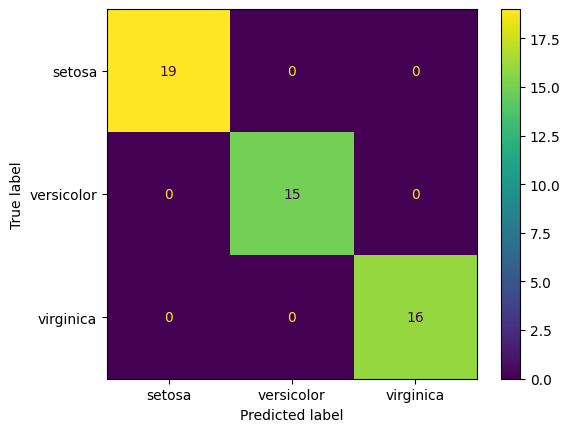

In [30]:
ConfusionMatrixDisplay.from_estimator(model, xtest, ytest)

In [31]:
ypred_test = model.predict(xtest)
ypred_test[0:5]

array(['versicolor', 'setosa', 'virginica', 'versicolor', 'versicolor'],
      dtype=object)

In [32]:
ytest.head()

,species
73,versicolor
18,setosa
117,virginica
78,versicolor
76,versicolor


In [33]:
from sklearn.metrics import classification_report

print(classification_report(ytest, ypred_test))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        15
   virginica       1.00      1.00      1.00        16

    accuracy                           1.00        50
   macro avg       1.00      1.00      1.00        50
weighted avg       1.00      1.00      1.00        50



### 5 fold cross validated result

In [34]:
from sklearn.model_selection import cross_val_score

scores = cross_val_score(model, xtrain, ytrain, cv=5, scoring="f1_macro")

In [35]:
scores

array([0.95213675, 0.80952381, 0.90277778, 1.        , 0.94747475])

In [36]:
scores.mean()

np.float64(0.9223826173826174)

### Above results show that this is a good model because f1_macro > 0.8

### Save the model object in joblib format

In [37]:
model

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

In [38]:
import joblib

joblib.dump(model, "model.joblib")

['model.joblib']

### Loading the model object

In [39]:
m = joblib.load("model.joblib")
m

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('logisticregression', LogisticRegression())])

### Create a function to predict out of sample data

In [48]:
def predict_results(model, sep_len, sep_wid, pet_len, pet_wid):
    # Get the data in dictionary format
    d = {
        "sepal_length": [sep_len],
        "sepal_width": [sep_wid],
        "petal_length": [pet_len],
        "petal_width": [pet_wid]
    }

    # Convert dictionary to dataframe
    xnew = pd.DataFrame(d)

    # Predict the results with probability
    preds = model.predict(xnew)
    probs = model.predict_proba(xnew)

    # Probs save as dictionary
    classes = model.classes_

    # Apply for loop and save results in dictionary format
    prob_d = {}
    for c, p in zip(classes, probs.flatten()):
        prob_d[c] = float(p)

    # Return prediction with prob
    return preds[0], prob_d
    

In [49]:
predict_results(model, 6.7, 3.1, 4.4, 1.4)

('versicolor',
 {'setosa': 0.012052007777467,
  'versicolor': 0.8399517649927665,
  'virginica': 0.1479962272297665})

In [ ]:
[0.2, 0.8, 0.4]